# Project: Investigate a Dataset (tmdb-movies.csv)

<a id='intro'></a>
## &#10070; Introduction

> &#x25cf; This dataset contains more than 10k information taken from the Movie Database (TMDb),"a community built movie and TV database."(www.themoviedb.org/about) Each row corresponds to a movie and includes a range of data about each film.

> &#x25cf; Relevant data to be used in the following analysis include the following variables:
>> - original_title	
>> - cast
>> - director
>> - genres
>> - vote_count	
>> - popularity	
>> - release_year	
>> - budget and budget_adj (budget in term of 2010 dollars)	
>> - revenue and revenue_adj (revenue in term of 2010 dollars)

> &#x25cf; in this report, i explore the following questions:
>> 1. How is revenues trending over time?
>> 2. How are budget trending over time?
>> 3. how does a film's budget relate to its profitability?
>> 4. Do higher budget movies always generate big revenue?
>> 5. Do top ratings movies always generate big revenue?
>> 6. Is there any impact of vote count on revenue?
>> 7. Can we provide a list of the most popular directors based on ratings?
>> 8. Can we provide a list of directors that generates big revenue?
>> 9. Is there a relation between popularity and revenue for directors?



> &#x25cf; Throughout my analysis, will be used  (revenue, budget, votes count, popularity and runtime) as primary variables


### &#10070; Question(s) for Analysis

> &#x25cf; What are the different factors that can affect movie revenue?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## &#10070; Data Wrangling







### 1. General Properties

### 1.1 Read and display the first five rows of data

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### 1.2 Display of data format (number of rows and number of columns)

In [3]:
df.shape

(10866, 21)

### 1.3 Display information about the data such as (the number of rows, the number of columns, the number of non-null values, and the data type of each column)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

 &#9865; **It seems from the data information that there are a number of columns that contain a lot of missing values, we will check them next**
 

### 1.4 Finding the number of missing values in each column

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

&#9865; **It is clear that most of the missing values are in the columns of type String, and we will not be able to fill them with statistical values, so we will delete most of them from the analysis**

### 1.5 Display the number of unique values in each column

In [6]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

&#9865; **Obviously the majority of the columns have less unique values than the total values of rows 10865, which is normal because the same values can be repeated inside most of them, except for the special column "original_title", where it is assumed that the movie title inside each row is unique and none of them are duplicates, So we'll check it out next**

### 1.6 Display the sum of the number and names of the repeated values in the column "original_title"

In [7]:
df['original_title'].duplicated().sum()

295

In [8]:
df[df['original_title'].duplicated()]['original_title']

1133            Survivor
1194     Finders Keepers
1349               Julia
1440            Brothers
1513                Home
              ...       
10818       Long Weekend
10827             Batman
10849             Gambit
10853              Alfie
10854          The Chase
Name: original_title, Length: 295, dtype: object

&#9865; **We will randomly choose more than one movie title and check them**

In [9]:
df[df['original_title'] == 'Finders Keepers'].iloc[:, np.r_[5,6,18]]

,original_title,cast,release_year
527,Finders Keepers,Shannon Whisnant|John Wood,2015
1194,Finders Keepers,Jaime Pressly|Kylie Rogers|Tobin Bell|Patrick ...,2014


In [10]:
df[df['original_title'] == 'Long Weekend'].iloc[:, np.r_[5,6,18]]

,original_title,cast,release_year
1908,Long Weekend,Jim Caviezel|Claudia Karvan|Robert Taylor|John...,2009
10818,Long Weekend,John Hargreaves|Briony Behets|Mike McEwen|Roy ...,1978


&#9865; **It seems clear from the random sample that the movie titles are not actually duplicated, Rather it is a re-production of the same films with a different scenario bearing the same name, so we will amend them later by placing a distinction for the year of release in parentheses next to each movie title**



&#9865; **To preserve the original data set, we will take a copy of this data and delete a set of columns with a lot of missing values such as 'homepage, tagline , keywords , overview , production_companies', because we will not be able to fill them with statistical values because they are all data of string type.**

&#9865; **We will delete the "imdb_id" column and use the "id" column instead, also the inflation-based "budget_adj" and "enue_adj" columns, and use the "budget" and "revenue" columns instead because they will do the same thing.**


### 2. Data Cleaning 

### 2.1 Make a copy of the dataset with specified columns inside a new variable

In [11]:
new_df= df.drop(['imdb_id','homepage','tagline','keywords','overview','production_companies','budget_adj','revenue_adj'],axis=1).copy()
new_df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


### 2.2 Check the remaining missing values and their percentage

In [12]:
new_df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [13]:
new_df.isnull().sum()*100/len(new_df)

id                0.000000
popularity        0.000000
budget            0.000000
revenue           0.000000
original_title    0.000000
cast              0.699429
director          0.404933
runtime           0.000000
genres            0.211669
release_date      0.000000
vote_count        0.000000
vote_average      0.000000
release_year      0.000000
dtype: float64

&#9865; **As it is clear, the percentage of missing values in the three columns 'cast', 'director' and 'genres' is negligible, as each of them did not exceed 1% of the total values, so we will drop and delete the rows that these missing values**

In [14]:
new_df.dropna(axis=0, inplace= True)

In [15]:
new_df.isnull().sum().any()

False

### 2.3 Check for duplicate rows and delete them

In [16]:
new_df.duplicated().any()

True

In [17]:
new_df.duplicated().sum()

1

In [18]:
new_df.drop_duplicates(inplace=True)

In [19]:
new_df.duplicated().any()

False

In [20]:
new_df.shape

(10731, 13)

### 2.4 Combine "release_year" values into "original_title" column to avoid duplicates

In [21]:
new_df['original_title']= new_df['original_title'] + " " + "(" + new_df['release_year'].astype(str) + ")"

### 2.5 Display overall statistics for a data set

In [22]:
new_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10731.000000,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000,10731.000000,10731.000000
mean,65201.741869,0.652615,1.480365e+07,4.031989e+07,102.468829,219.812972,5.964710,2001.259622
std,91470.508056,1.004804,3.106456e+07,1.176524e+08,30.493873,578.815324,0.930283,12.820151
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10547.500000,0.210765,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20323.000000,0.387081,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000
75%,73948.500000,0.720889,1.600000e+07,2.500000e+07,112.000000,148.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


<a id='eda'></a>
## &#10070; Exploratory Data Analysis

> &#x25cf; After we've narrowed down the dataset and cleaned it up, we'll do statistics and visualizations with a view to answering the question in the Introduction section.



### 1.General overview

###  1.1 Display the histogram of a set of data

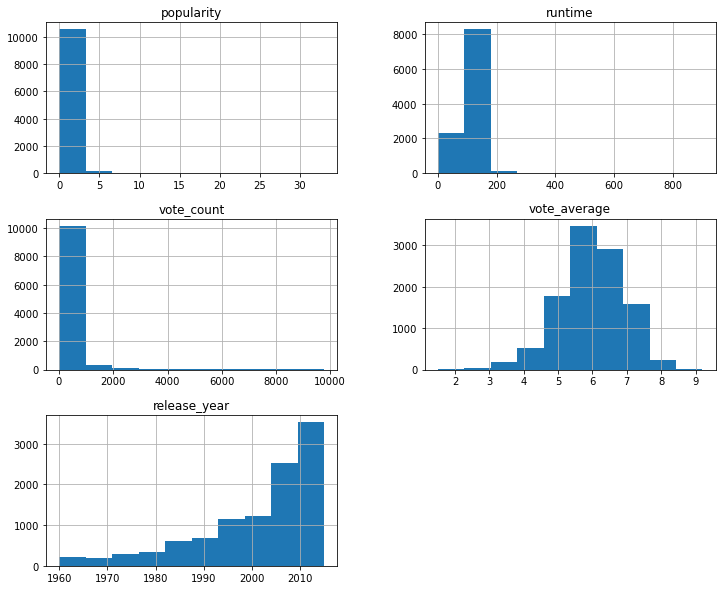

In [23]:
new_df.iloc[:, np.r_[1,7,9:13]].hist(figsize=(12,10));

&#9865; **The level of popularity is mostly limited to the ratio of 0:3,the runtime is from 120:180 minutes, and most of the votes are from 0:1000**

### 1.2 Check total revenue and budget

In [24]:
new_df.budget.sum(),new_df.revenue.sum()

(158857926772, 432672713707)

In [25]:
new_df.revenue.sum()*100/new_df.budget.sum()

272.36457286012

&#9865; **Profits ratio from 1960 to 2015 exceeded 272%**

### 1.3 The year with the highest and lowest revenue

In [26]:
print("Most revenue year: ",new_df.groupby('release_year').sum()['revenue'].nlargest(1).astype('int64'),"\n")
print("Lowest revenue year: ",new_df.groupby('release_year').sum()['revenue'].nsmallest(1).astype('int64'))

Most revenue year:  release_year
2015    26762450518
Name: revenue, dtype: int64 

Lowest revenue year:  release_year
1966    84736689
Name: revenue, dtype: int64


### 1.4 The year with the highest and lowest budget costs

In [27]:
print("Most revenue year: ",new_df.groupby('release_year').sum()['budget'].nlargest(1).astype('int64'),"\n")
print("Lowest revenue year: ",new_df.groupby('release_year').sum()['budget'].nsmallest(1).astype('int64'))

Most revenue year:  release_year
2010    9354101006
Name: budget, dtype: int64 

Lowest revenue year:  release_year
1960    22056948
Name: budget, dtype: int64


### 2. Investigate the factors affecting movies revenues

### 2.1 What is the trajectory of the linear chart for movie revenues and budgets from 1960 to 2015?

> &#x25cf; **We will first make an abbreviation for the numbers due to their large length so that they appear more clearly, by placing the symbol "K" for the thousand numbers, "M" for the million numbers, and "B" for the billion numbers, by a function we will create**


In [28]:
@ticker.FuncFormatter
def revenue_value(num_value,indx):
    if num_value >= 1000000000:
        num = '{:1.1f}B'.format(num_value*0.000000001)
        
    elif num_value >= 1000000:
        num = '{:1.1f}M'.format(num_value*0.000001)
        
    else:
        num = '{:1.1f}K'.format(num_value*0.001)
        
    return num

### 2.1.1 Line chart path to gross movie revenue and budgets for each year


&#x25cf; **We will create a master variable named 'years' containing the numbers for each year to be used in most "x" plots**

In [29]:
years= new_df.groupby('release_year').count().index

&#x25cf; **Check the lowest total revenues and budgets to put an appropriate number inside "plt.yticks" to start the chart from**

In [30]:
print(new_df.groupby('release_year').sum()['revenue'].nsmallest(1).astype('int64'),'\n')
print(new_df.groupby('release_year').sum()['budget'].nsmallest(1).astype('int64'))

release_year
1966    84736689
Name: revenue, dtype: int64 

release_year
1960    22056948
Name: budget, dtype: int64


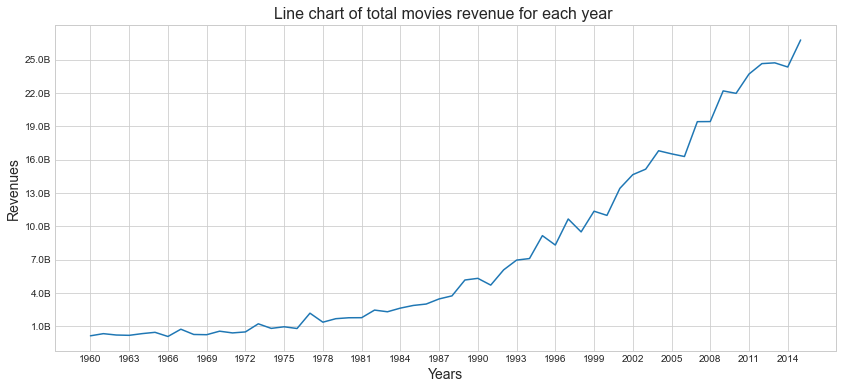

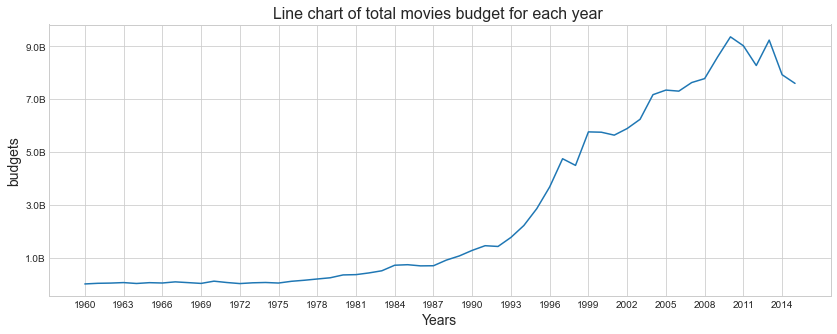

In [31]:
#Create two variables each for total revenue and budgets by year to be used in "y" plot
total_revenue_year= new_df.groupby('release_year').sum()['revenue'].astype('int64').values
total_budget_year= new_df.groupby('release_year').sum()['budget'].astype('int64').values

#plot Line Chart of Total Revenue for Each Year
plt.style.use('seaborn-whitegrid')
fig,ax1 = plt.subplots(figsize=(14,6))
ax1.plot(years,total_revenue_year)
plt.xticks(np.arange(min(years), max(years)+1, 3 ))
plt.yticks(np.arange(1000000000, max(total_revenue_year)+1, 3000000000 ))
plt.title('Line chart of total movies revenue for each year ',fontsize=16)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Revenues',fontsize=14);
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(revenue_value)) #This method of converting long numbers into numerical symbols, by placing the function we created earlier inside it


#plot Line Chart of Total budget for Each Year
plt.style.use('seaborn-whitegrid')
fig,ax2 = plt.subplots(figsize=(14,5))
ax2.plot(years,total_budget_year)
plt.xticks(np.arange(min(years), max(years)+1, 3 ))
plt.yticks(np.arange(1000000000, max(total_budget_year)+1, 2000000000 ))
plt.title('Line chart of total movies budget for each year ',fontsize=16)
plt.xlabel('Years',fontsize=14)
plt.ylabel('budgets',fontsize=14)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(revenue_value))# This method of converting long numbers into numerical symbols, by placing the function we created earlier inside it

&#9865; **The graph shows that the trend of both budgets and revenues has been increasing fairly evenly, especially since the beginning of about 1984.**

### 2.1.2 Line chart path to average movie revenue and budgets for each year

&#x25cf; **Check the lowest average revenues and budgets to put an appropriate number inside "plt.yticks" to start the chart from**

In [32]:
print(new_df.groupby('release_year').mean()['budget'].nsmallest(1).astype('int64'),'\n')
print(new_df.groupby('release_year').mean()['budget'].nlargest(1).astype('int64'))

release_year
1960    689279
Name: budget, dtype: int64 

release_year
1999    25737656
Name: budget, dtype: int64


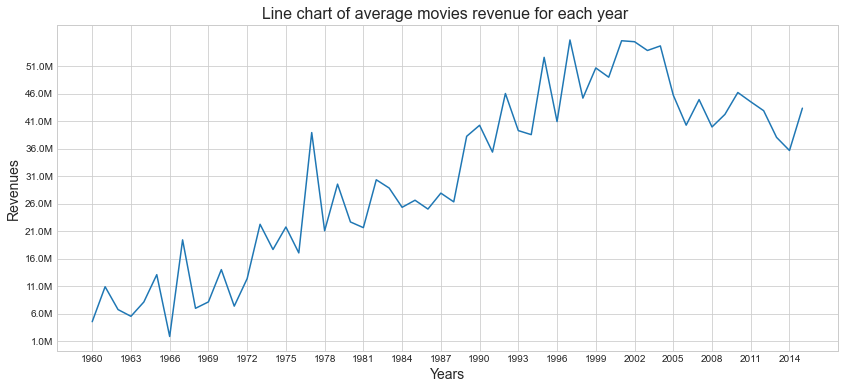

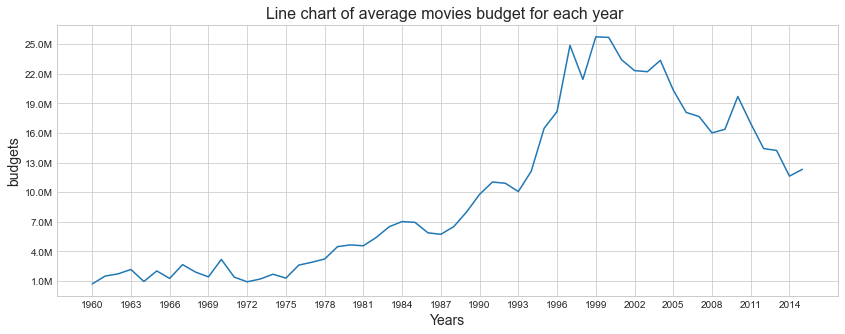

In [33]:
#Create two variables each for average revenue and budgets by year to be used in "y" plot
mean_revenue_year= new_df.groupby('release_year').mean()['revenue'].astype('int64').values
mean_budget_year= new_df.groupby('release_year').mean()['budget'].astype('int64').values

#plot Line Chart of average Revenue for Each Year
plt.style.use('seaborn-whitegrid')
fig,ax3 = plt.subplots(figsize=(14,6))
ax3.plot(years,mean_revenue_year)
plt.xticks(np.arange(min(years), max(years)+1, 3 ))
plt.yticks(np.arange(1000000, max(mean_revenue_year)+1, 5000000 ))
plt.title('Line chart of average movies revenue for each year ',fontsize=16)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Revenues',fontsize=14);
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(revenue_value)) #This method of converting long numbers into numerical symbols, by placing the function we created earlier inside it

#plot Line Chart of average budget for Each Year
plt.style.use('seaborn-whitegrid')
fig,ax4 = plt.subplots(figsize=(14,5))
ax4.plot(years,mean_budget_year)
plt.xticks(np.arange(min(years), max(years)+1, 3 ))
plt.yticks(np.arange(1000000, max(mean_budget_year)+1, 3000000 ))
plt.title('Line chart of average movies budget for each year ',fontsize=16)
plt.xlabel('Years',fontsize=14)
plt.ylabel('budgets',fontsize=14)
ax4.yaxis.set_major_formatter(ticker.FuncFormatter(revenue_value)) #This method of converting long numbers into numerical symbols, by placing the function we created earlier inside it

&#9865; **In general, the graph shows that the trend of average budgets and revenues for each year is increasing with some fluctuations, and since the beginning of around 2001 each of them has significantly decreased**

### 2.2 What is the path of the line chart for the total number of movies produced per year ?

&#x25cf; **Check the lowest total number of movies to put an appropriate number inside "plt.yticks" to start the chart from**

In [34]:
new_df.groupby('release_year').count()['id'].nsmallest(1).astype('int64') 

release_year
1969    30
Name: id, dtype: int64

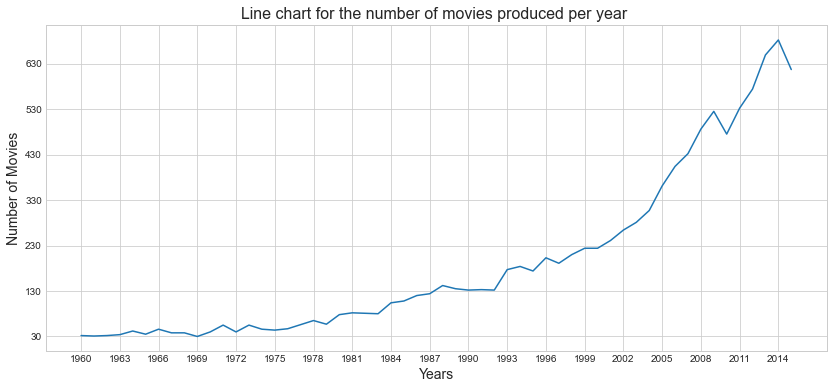

In [35]:
#Create a variable for the total number of movies per year to be used in "y" plot
count_year = new_df.groupby('release_year').count()['original_title']

#plot line chart of the total number of movies per year
plt.style.use('seaborn-whitegrid')
fig,ax3 = plt.subplots(figsize=(14,6))
ax3.plot(years,count_year)
plt.xticks(np.arange(min(years), max(years)+1, 3 ))
plt.yticks(np.arange(30, max(count_year)+1, 100 ))
plt.title('Line chart for the number of movies produced per year ',fontsize=16)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Number of Movies',fontsize=14);

&#9865; **The graph shows that the number of films was constantly increasing in a smooth manner, such as the total of revenues and budgets, which seems logical that in general, the more films produced, the greater the total number of revenues and budgets**

### 2.3 What are the different factors that can significantly affect movies revenue by scatter?

### 2.3.1 Can revenues be affected by the large or small size of the budgets?

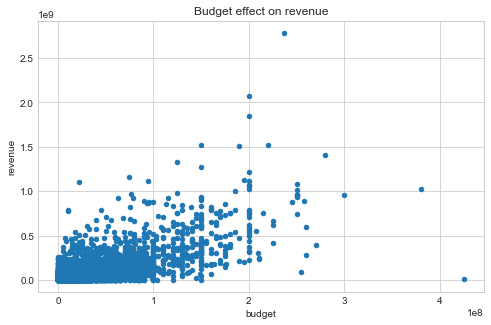

In [36]:
new_df.plot(x="budget", y="revenue", kind="scatter",title='Budget effect on revenue', figsize=(8, 5));

&#9865; **The graph shows that the size of the budget has a positive effect on the revenue return, as the larger the size of the movie budgets, the greater the revenue return with it.**

### 2.3.2 Does popularity affect movies revenue?

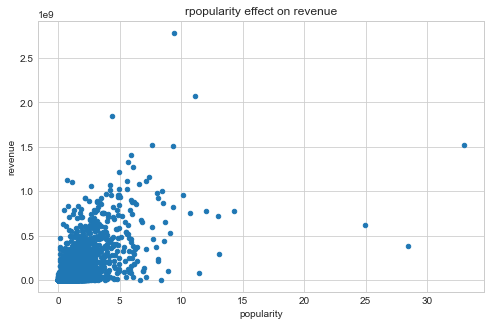

In [37]:
new_df.plot(x="popularity", y="revenue", kind="scatter",title='popularity effect on revenue', figsize=(8, 5));

&#9865; **The graph shows that increasing popularity also has a slightly positive effect on increasing revenue return**

### 2.3.3 Does vote count affect movies revenue?

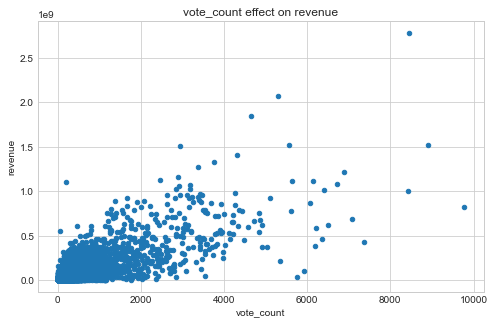

In [38]:
new_df.plot(x="vote_count", y="revenue", kind="scatter",title='vote_count effect on revenue',figsize=(8, 5));

&#9865; **The graph shows that the number of votes has a greater positive effect than popularity in increasing profits**

### 2.3.4 Does the durations of runtime affect movie revenue??

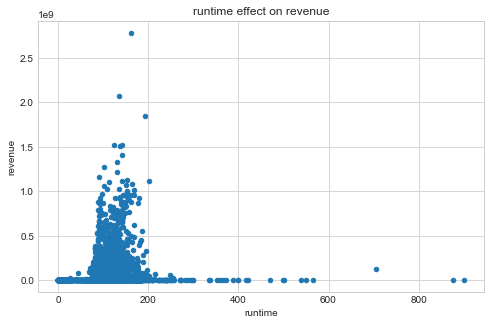

In [39]:
new_df.plot(x="runtime", y="revenue", kind="scatter",title='runtime effect on revenue', figsize=(8, 5));

&#9865; **The graph shows that when the runtime exceeds the 200-minute period, it has a significant negative impact on the decrease in the revenue yield.**

### 2.3.5 Is there a relationship between the votes count and the size of popularity?

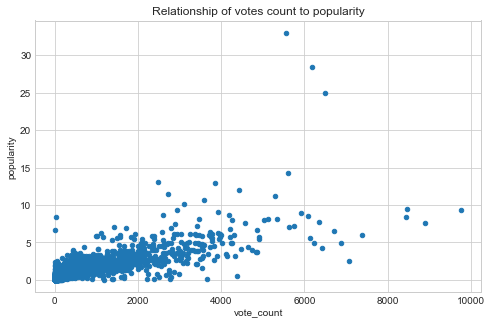

In [40]:
new_df.plot(x="vote_count", y="popularity", kind="scatter",title='Relationship of votes count to popularity', figsize=(8, 5));

&#9865; **Through the graph, it shows that there is a positive relationship in the increase in popularity with the increase in the votes count.**

### 3. Display the top 10 movies and directors in terms of revenue, votes count, and popularity

### 3.1 What are the top 10 movies based on revenue volume?

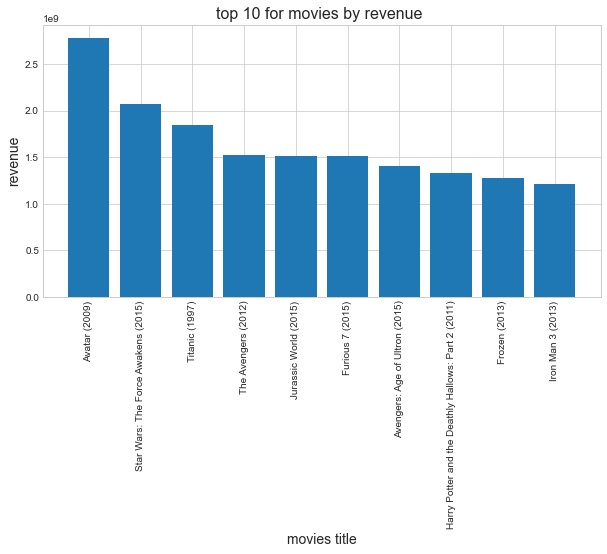

In [41]:
top10_mov_re= new_df.groupby('original_title').sum()['revenue'].nlargest(10)

plt.subplots(figsize=(10, 5))
plt.bar(top10_mov_re.index, top10_mov_re.values)
plt.xticks(rotation='vertical')
plt.title('top 10 for movies by revenue ',fontsize=16)
plt.xlabel('movies title',fontsize=14)
plt.ylabel('revenue',fontsize=14);

&#9865; **'Avatar (2009)' took first place for highest revenue, followed in second place by 'Star Wars: The Force Awakens (2015)' and third place by 'Titanic (1997)'.**

### 3.2 What are the top 10 movies based on votes count?

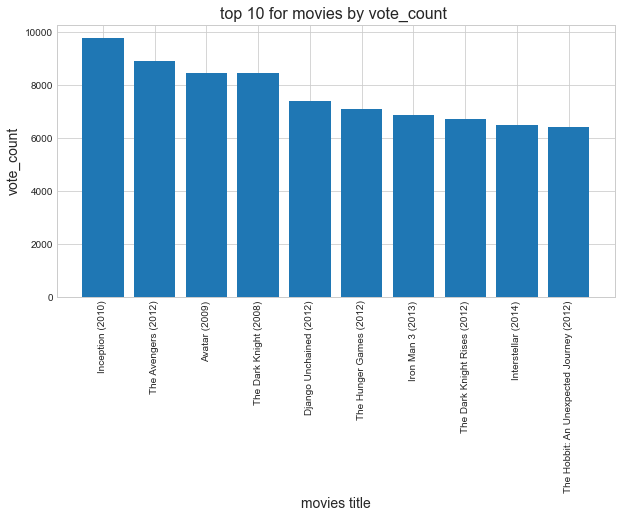

In [42]:
top10_mov_votco= new_df.groupby('original_title').sum()['vote_count'].nlargest(10)

plt.subplots(figsize=(10, 5))
plt.bar(top10_mov_votco.index, top10_mov_votco.values)
plt.xticks(rotation='vertical')
plt.title('top 10 for movies by vote_count ',fontsize=16)
plt.xlabel('movies title',fontsize=14)
plt.ylabel('vote_count',fontsize=14);

&#9865; **'Inception (2010) ranked first for the highest number of votes', followed by second place 'The Avengers (2012)' and followed by third place 'Avatar (2009)'.**

### 3.3 What are the top 10 movies based on popularity?

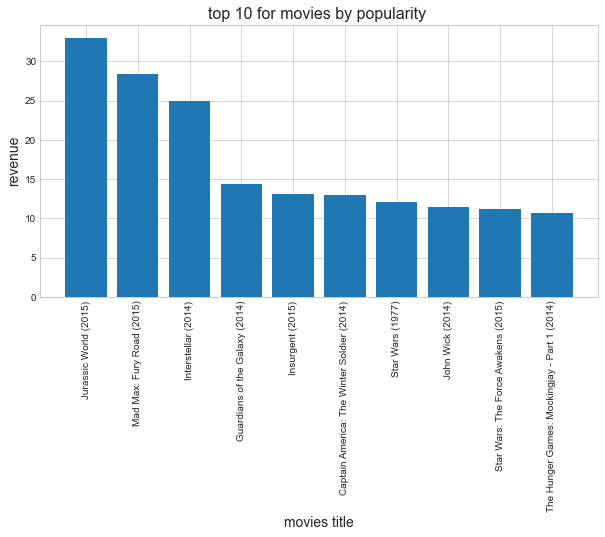

In [43]:
top10_mov_pop= new_df.groupby('original_title').sum()['popularity'].nlargest(10)

plt.subplots(figsize=(10, 5))
plt.bar(top10_mov_pop.index, top10_mov_pop.values)
plt.xticks(rotation='vertical')
plt.title('top 10 for movies by popularity ',fontsize=16)
plt.xlabel('movies title',fontsize=14)
plt.ylabel('revenue',fontsize=14);

&#9865; **'Jurassic World (2015)' was ranked first in popularity, followed by second place 'Mad Max: Fury Road (2015)' and third place followed by 'Interstellar (2014)'.**

### 3.4 What are the top 10 directors based on revenue volume?

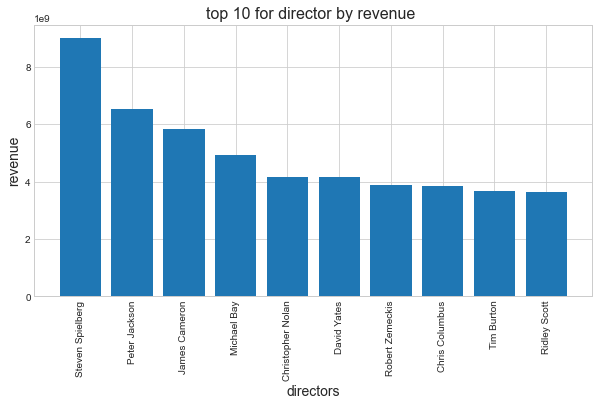

In [44]:
top10_dir_rev= new_df.groupby('director').sum()['revenue'].nlargest(10)

plt.subplots(figsize=(10, 5))
plt.bar(top10_dir_rev.index, top10_dir_rev.values)
plt.xticks(rotation='vertical')
plt.title('top 10 for director by revenue ',fontsize=16)
plt.xlabel('directors',fontsize=14)
plt.ylabel('revenue',fontsize=14);

&#9865; **Director 'Steven Spielberg' ranked first for the highest revenues, followed by director 'Peter Jackson' in second place and director 'James Cameron' in third place.**

### 3.5 What are the top 10 movies based on votes count?

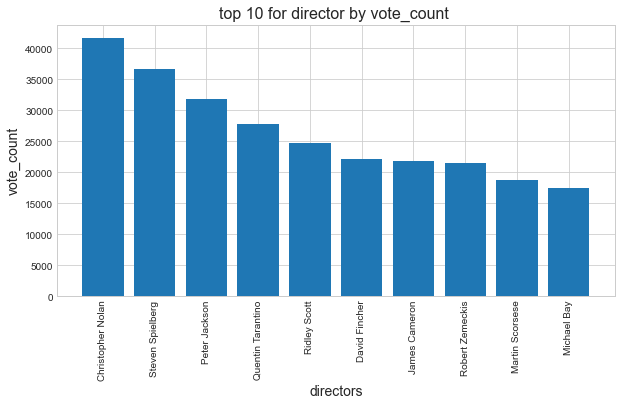

In [45]:
top10_dir_votco= new_df.groupby('director').sum()['vote_count'].nlargest(10)

plt.subplots(figsize=(10, 5))
plt.bar(top10_dir_votco.index, top10_dir_votco.values)
plt.xticks(rotation='vertical')
plt.title('top 10 for director by vote_count ',fontsize=16)
plt.xlabel('directors',fontsize=14)
plt.ylabel('vote_count',fontsize=14);

&#9865; **Director 'Christopher Nolan' ranked first with the highest votes count, followed by director 'Steven Spielberg' in second place and director 'Peter Jackson' in third place.**

### 3.6 What are the top 10 movies based on popularity?

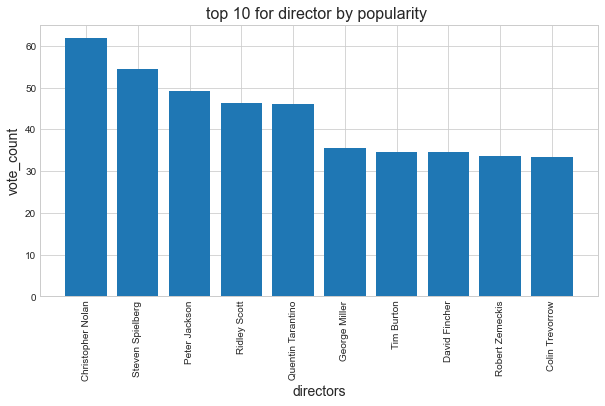

In [46]:
top10_dir_pop= new_df.groupby('director').sum()['popularity'].nlargest(10)

plt.subplots(figsize=(10, 5))
plt.bar(top10_dir_pop.index, top10_dir_pop.values)
plt.xticks(rotation='vertical')
plt.title('top 10 for director by popularity ',fontsize=16)
plt.xlabel('directors',fontsize=14)
plt.ylabel('vote_count',fontsize=14);

&#9865; **Director 'Christopher Nolan' ranked first in terms of popularity, followed in second place by director 'Steven Spielberg' and in third place by director 'Peter Jackson'.**

<a id='conclusions'></a>
## Conclusions

> &#x25cf; **Through the path of the linear scheme of revenues and budgets, each of them was increasing in a smooth and continuous manner, especially since the beginning of about the year 1984.**

> &#x25cf; **Scattering graphics showed that there is a significant impact of the volume of the budget on the volume of revenue**

> &#x25cf; **The scattering graphics also showed that the votes count and popularity factors had an impact on the volume of revenue, but the votes count was more.**

> &#x25cf; **Scatter graphics showed that films whose runtimes ranged from 90 to 180 minutes, the revenue volume was affected more by it, as when the runtimes exceeded 200 minutes, the revenue decreased very significantly.**

> &#x25cf; **In the end, we briefly reviewed the best films and directors in terms of revenue, votes count and popularity, with directors Christopher Nolan, Steven Spielberg and Peter Jackson taking the top three places in terms of popularity and votes count in the same order.**

### Limitations
> &#x25cf; **There was a limitation that most of the missing values are in columns of type String, and we could not fill them with statistical values, so we removed these columns from the analysis.**
